# SME0878 - MINERAÇÃO ESTATÍSTICA DE DADOS

TRABALHO 4

Nomes:
Aimê Gomes da Nobrega (Nro USP 11882429) <br>
Adriane Akemi Yamaguti (Nro USP 11915623)

Professor: Jorge Luis Bazan

---

---
---

# **ENTENDIMENTO DOS DADOS**

---

## **OBJETIVO: Coletar e fazer uma análise exploratória dos dados visando encontrar relações entre a variável objetivo (ViolentCrimesPerPop) e as covariáveis (demais variáveis)**

---


## Aquisição dos dados 

Os dados encontram-se no repositório https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime, contendo um conjunto de variáveis obtidas no CENSO de 1990 nos Estados Unidos.

O objetivo deste estudo é identificar quais atributos precisam serem melhorados para que a criminalidade diminua e forneça mais segurança para a população.

</br>

## Importação das bibliotecas

Neste projeto, foram importadas as seguintes bibliotecas:

In [1]:
import numpy as np
# from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Funções auxiliares

Criamos algumas funções para nos auxiliar ao longo deste trabalho:

In [2]:
def graph_by_state(df, col, estimator='mean', palette='winter'):
    if estimator == 'mean':
        state = df.groupby('state')[col].mean().reset_index()
    elif estimator == 'median':
        state = df.groupby('state')[col].median().reset_index()
    else:
        print('estimator not recognized')
    state.sort_values(by=col, ascending=False, inplace=True)
    
    plt.figure(figsize=(12,12))
    sns.barplot(data=state, y='state', x=col, palette=palette)
    plt.show()

def print_is_duplicated(df):
    """
    Função que verifica se os dados estão duplicados. Se sim,
    mostra a quantidade de dados duplicados.
    """
    confirmation = df.duplicated().values.any()
    print(f"Existem valores duplicados? {confirmation}")
    if confirmation == True:
        print(f"Existem no total {df.duplicated().sum()} linhas duplicadas.")
    else:
        print('Não existem linhas duplicadas.')


def print_is_na(df):
    """
    Função que verifica se os dados estão duplicados. Se sim,
    retorna um dataframe com a quantidade de dados duplicados
    em valor absoluto e a porcentagem relativa.
    """
    confirmation = df.isnull().values.any()
    print(f"Existem valores nulos? {confirmation}\n")
    if confirmation == True:
        na = pd.concat([df.isna().sum(), round((df.isna().sum()/df.shape[0])*100, 2)], axis = 1).reset_index()
        na.columns = ["coluna", "absoluto", "porcentagem"]
#         print(na )
        return na
    else:
        print('Não existem valores ausentes.')

## Leitura dos dados

In [3]:
# Leitura dos nomes das variáveis
attrib = pd.read_csv('data/attributes.csv', delim_whitespace = True)
# Conforme o dicionário de dados, precisamos ajustar o tipo de algumas colunas para trabalharmos de forma correta:
dtypes = {'state':'object', 'LemasGangUnitDeploy':'object', 'county':'Int64', 'community':'Int64'}
# Leitura da base
data = pd.read_csv('data/communities.data.csv', names = attrib['attributes'], dtype= dtypes, na_values=["?"])

In [4]:
print(f"O dataset possui {data.shape[0]} linhas e {data.shape[1]} colunas.")
# Mostra as 5 primeiras linhas
data.head()

O dataset possui 1994 linhas e 128 colunas.


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,<NA>,<NA>,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,<NA>,<NA>,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,<NA>,<NA>,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0

## Dicionário e estrutura do conjunto de dados

-- ```state <string>```: estado dos EUA

-- ```county <int>```: código numérico para município

-- ```community: <int>```: código numérico para comunidade

-- ```communityname <string>```: nome da comunidade
    
-- ```fold <int>```: número de fold para cross validation, serve para depuração e testes pareados
    
-- ```population <float>```: população para comunidade
    
-- ```householdsize <float>```: média de pessoas por família
    
-- ```racepctblack <float>```: porcentagem da população afro-americana
    
-- ```racePctWhite <float>```: porcentagem da população que é caucasiana
    
-- ```racePctAsian <float>```: porcentagem da população que é de origem asiática
    
-- ```racePctHisp <float>```: porcentagem da população que é de origem hispânica
    
-- ```agePct12t21 <float>```: porcentagem da população com idade entre 12 e 21 anos
    
-- ```agePct12t29 <float>```: porcentagem da população com idade entre 12 e 29 anos
    
-- ```agePct16t24 <float>```: porcentagem da população com idade entre 16 e 24 anos
    
-- ```agePct65up <float>```: porcentagem da população com 65 anos ou mais
    
-- ```numbUrbano <float>```: número de pessoas que vivem em áreas classificadas como urbanas
    
-- ```pctUrbano <float>```: percentual de pessoas que vivem em áreas classificadas como urbanas
    
-- ```medIncome <float>```: renda familiar mediana
    
-- ```pctWWage <float>```: porcentagem de domicílios com rendimentos salariais ou salariais em 1989
    
-- ```pctWFarmSelf <float>```: porcentagem de domicílios com renda agrícola ou por conta própria em 1989
    
-- ```pctWInvInc <float>```: porcentagem de domicílios com renda de investimento/aluguel em 1989
    
-- ```pctWSocSec <float>```: percentual de domicílios com renda previdenciária em 1989
    
-- ```pctWPubAsst <float>```: porcentagem de domicílios com renda de assistência pública em 1989
    
-- ```pctWRetire <float>```: percentual de domicílios com renda de aposentadoria em 1989
    
-- ```medFamInc <float>```: renda familiar mediana (difere da renda familiar para famílias não familiares)
    
-- ```perCapInc <float>```: renda per capita
    
-- ```whitePerCap <float>```: renda per capita para caucasianos
    
-- ```blackPerCap <float>```: renda per capita para afro-americanos
    
-- ```indianPerCap <float>```: renda per capita para americanos nativos
    
-- ```AsianPerCap <float>```: renda per capita para pessoas de origem asiática
    
-- ```OtherPerCap <float>```: renda per capita para pessoas com 'outros' patrimônios
    
-- ```HispPerCap <float>```: renda per capita para pessoas com ascendência hispânica
    
-- ```NumUnderPov <float>```: número de pessoas abaixo do nível de pobreza
    
-- ```PctPopUnderPov <float>```: percentual de pessoas abaixo do nível de pobreza
    
-- ```PctLess9thGrade <float>```: porcentagem de pessoas com 25 anos ou mais com menos de 9º ano de escolaridade
    
-- ```PctNotHSGrad <float>```: porcentagem de pessoas com 25 anos ou mais que não concluíram o ensino médio
    
-- ```PctBSorMore <float>```: percentual de pessoas de 25 anos ou mais com graduação ou ensino superior
    
-- ```PercentUnemployed <float>```: porcentagem de pessoas com 16 anos ou mais, na força de trabalho e desempregadas
    
-- ```PctEmploy <float>```: porcentagem de pessoas com 16 anos ou mais que estão empregadas
    
-- ```PctEmplManu <float>```: porcentagem de pessoas de 16 anos ou mais empregadas na manufatura
    
-- ```PctEmplProfServ <float>```: percentual de pessoas com 16 anos ou mais que trabalham em serviços profissionais
    
-- ```PctOccupManu <float>```: porcentagem de pessoas com 16 anos ou mais empregadas na manufatura
    
-- ```PctOccupMgmtProf <float>```: porcentagem de pessoas com 16 anos ou mais que estão empregadas em cargos gerenciais ou profissionais
    
-- ```MalePctDivorce <float>```: porcentagem de homens divorciados
    
-- ```MalePctNevMarr <float>```: porcentagem de homens que nunca se casaram
    
-- ```FemalePctDiv <float>```: porcentagem de mulheres divorciadas
    
-- ```TotalPctDiv <float>```: porcentagem da população que é divorciada
    
-- ```PersPerFam <float>```: número médio de pessoas por família
    
-- ```PctFam2Par <float>```: porcentagem de famílias (com filhos) chefiadas por dois pais
    
-- ```PctKids2Par <float>```: porcentagem de crianças em moradia familiar com os dois pais
    
-- ```PctYoungKids2Par <float>```: porcentagem de crianças de 4 anos ou menos em famílias com dois pais
    
-- ```PctTeen2Par <float>```: porcentagem de crianças de 12 a 17 anos em famílias com dois pais
    
-- ```PctWorkMomYoungKids <float>```: porcentagem de mães de crianças de 6 anos ou menos na força de trabalho
    
-- ```PctWorkMom <float>```: percentual de mães de menores de 18 anos na força de trabalho
    
-- ```NumIlleg <float>```: número de filhos nascidos que nunca se casaram

-- ```NumImmig <float>```: número total de pessoas conhecidas como estrangeiras

-- ```PctImmigRecent <float>```: porcentagem de _imigrantes_ que imigraram nos últimos 3 anos

-- ```PctImmigRec5 <float>```: porcentagem de _imigrantes_ que imigraram nos últimos 5 anos

-- ```PctImmigRec8 <float>```: porcentagem de _imigrantes_ que imigraram nos últimos 8 anos

-- ```PctImmigRec10 <float>```: porcentagem de _imigrantes_ que imigraram nos últimos 10 anos

-- ```PctRecentImmig <float>```: porcentagem de _population_ que imigraram nos últimos 3 anos

-- ```PctRecImmig5 <float>```: porcentagem de _population_ que imigraram nos últimos 5 anos

-- ```PctRecImmig8 <float>```: porcentagem de _population_ que imigraram nos últimos 8 anos

-- ```PctRecImmig10 <float>```: porcentagem de _population_ que imigraram nos últimos 10 anos

-- ```PctSpeakEnglOnly <float>```: porcentagem de pessoas que falam apenas inglês

-- ```PctNotSpeakEnglWell <float>```: porcentagem de pessoas que não falam inglês bem

-- ```PctLargHouseFam <float>```: porcentagem de domicílios familiares grandes (6 ou mais)
-- ```PctLargHouseOccup <float>```: porcentagem de todos os domicílios ocupados que são grandes (6 ou mais pessoas)

-- ```PersPerOccupHous <float>```: média de pessoas por domicílio (numérico - decimal)

-- ```PersPerOwnOccHous <float>```: média de pessoas por domicílio ocupado pelo proprietário

-- ```PersPerRentOccHous <float>```: média de pessoas por domicílio alugado

-- ```PctPersOwnOccup <float>```: porcentagem de pessoas em domicílios ocupados pelo proprietário

-- ```PctPersDenseHous <float>```: porcentagem de pessoas em alojamentos densos (mais de 1 pessoa por cômodo)

-- ```PctHousLess3BR <float>```: percentual de domicílios com menos de 3 dormitórios

-- ```MedNumBR <float>```: número médio de quartos

-- ```HousVacant <float>```: número de domicílios vagos

-- ```PctHousOccup <float>```: porcentagem de habitação ocupada

-- ```PctHousOwnOcc <float>```: porcentagem de domicílios ocupados pelo proprietário

-- ```PctVacantBoarded <float>```: porcentagem de casas vagas que estão fechadas com tábuas

-- ```PctVacMore6Mos <float>```: percentual de moradias vazias que estão desocupadas há mais de 6 meses

-- ```MedYrHousBuilt <float>```: ano médio de unidades habitacionais construídas

-- ```PctHousNoPhone <float>```: percentual de domicílios ocupados sem telefone (em 1990, isso era raro!)

-- ```PctWOFullPlumb <float>```: percentual de habitação sem instalações hidráulicas completas

-- ```OwnOccLowQuart <float>```: habitação ocupada pelo proprietário - valor do quartil inferior

-- ```OwnOccMedVal <float>```: habitação ocupada pelo proprietário - valor mediano

-- ```OwnOccHiQuart <float>```: habitação ocupada pelo proprietário - valor do quartil superior
-- ```RentLowQ <float>```: casa alugada - aluguel do quartil inferior

-- ```RentMedian <float>```: aluguel de moradia - aluguel mediano (variável do Censo H32B do arquivo STF1A)

-- ```RentHighQ <float>```: casa alugada - aluguel do quartil superior

-- ```MedRent <float>```: aluguel bruto médio (variável do Censo H43A do arquivo STF3A - inclui utilitários)

-- ```MedRentPctHousInc <float>```: aluguel bruto mediano como uma porcentagem da renda familiar

-- ```MedOwnCostPctInc <float>```: custo médio dos proprietários como uma porcentagem da renda familiar - para 
proprietários com hipoteca

-- ```MedOwnCostPctIncNoMtg <float>```: custo médio dos proprietários como uma porcentagem da renda familiar - para proprietários sem hipoteca

-- ```NumInShelters <float>```: número de pessoas em abrigos para sem-teto

-- ```NumStreet <float>```: número de moradores de rua contados na rua

-- ```PctForeignBorn <float>```: porcentagem de pessoas nascidas no exterior

-- ```PctBornSameState <float>```: porcentagem de pessoas nascidas no mesmo estado em que vivem atualmente

-- ```PctSameHouse85 <float>```: porcentagem de pessoas vivendo na mesma casa em 1985 (5 anos antes)

-- ```PctSameCity85 <float>```: porcentagem de pessoas vivendo na mesma cidade em 1985 (5 anos antes)

-- ```PctSameState85 <float>```: porcentagem de pessoas vivendo no mesmo estado em 1985 (5 anos antes)

-- ```LemasSwornFT <float>```: número de policiais empossados em tempo integral

-- ```LemasSwFTPerPop <float>```: policiais em tempo integral empossados por 100 mil habitantes (numérico - decimal)

-- ```LemasSwFTFieldOps <float>```: número de policiais empossados em tempo integral em operações de campo (na rua em oposição a administrativas etc)

-- ```LemasSwFTFieldPerPop <float>```: policiais em tempo integral em operações de campo (na rua em oposição a administrativo etc) por 100 mil habitantes

-- ```LemasTotalReq <float>```: total de requisições para polícia

-- ```LemasTotReqPerPop <float>```: total de solicitações de policiais por 100 mil habitantes

-- ```PolicReqPerOffic <float>```: total de solicitações de policiais por policial

-- ```PolicPerPop <float>```: policiais por 100 mil habitantes

-- ```RacialMatchCommPol <float>```: uma medida da correspondência racial entre a comunidade e a força policial. Valores altos indicam que as proporções na comunidade e na força policial são semelhantes

-- ```PctPolicWhite <float>```: porcentagem de policiais caucasianos

-- ```PctPolicBlack <float>```: percentual de policiais afro-americanos

-- ```PctPolicHisp <float>```: porcentagem de policiais que são hispânicos

-- ```PctPolicAsian <float>```: porcentagem de policiais asiáticos

-- ```PctPolicMinor <float>```: porcentagem de policiais que são minoria de qualquer tipo

-- ```OficAssgnDrugUnits <float>```: número de policiais designados para unidades especiais de drogas

-- ```NumKindsDrugsSeiz <float>```: número de diferentes tipos de drogas apreendidas

-- ```PolicAveOTWorked <float>```: média de horas extras trabalhadas pela polícia

-- ```LandArea <float>```: área do terreno em milhas quadradas

-- ```PopDens <float>```: densidade populacional em pessoas por milha quadrada

-- ```PctUsePubTrans <float>```: percentual de pessoas que usam o transporte público para deslocamento

-- ```PolicCars <float>```: número de carros de polícia

-- ```PolicOperBudg <float>```: orçamento operacional da polícia

-- ```LemasPctPolicOnPatr <float>```: porcentagem de policiais em patrulha em tempo integral

-- ```LemasGangUnitDeploy <string>```: unidade de gangue implantada (0: NÃO, 1: SIM, 0.5: meio período)

-- ```LemasPctOfficDrugUn <float>```: porcentagem de policiais designados para unidades antidrogas

-- ```PolicBudgPerPop <float>```: orçamento operacional da polícia por população

-- ```ViolentCrimesPerPop <float>```: número total de crimes violentos por 100 mil habitantes

## Tratamento dos dados

Exibimos a leitura da tipagem dos dados:

In [5]:
# Exibe os tipos de cada coluna
data.dtypes

state                     object
county                     Int64
community                  Int64
communityname             object
fold                       int64
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCa

### Verificando duplicidade

Com a ajuda das nossas funções auxiliares criadas anteriormente, podemos verificar se existem dados duplicados.

In [6]:
print_is_duplicated(data)

Existem valores duplicados? False
Não existem linhas duplicadas.


### Verificando valores ausentes

Vamos verificar a existência de valores nulos e o quanto isso representa no nosso conjunto de dados:

In [7]:
df_na = print_is_na(data)
# Filtramos para apresentar somente as colunas com os valores ausentes
df_na.loc[df_na["absoluto"] != 0]

Existem valores nulos? True



,coluna,absoluto,porcentagem
1,county,1174,58.88
2,community,1177,59.03
30,OtherPerCap,1,0.05
101,LemasSwornFT,1675,84.00
102,LemasSwFTPerPop,1675,84.00
103,LemasSwFTFieldOps,1675,84.00
104,LemasSwFTFieldPerPop,1675,84.00
105,LemasTotalReq,1675,84.00
106,LemasTotReqPerPop,1675,84.00
107,PolicReqPerOffic,1675,84.00


# ANÁLISE EXPLORATÓRIA DOS DADOS

## Análise univariada

### Análise do Target (ViolentCrimesPerPop: número total de crimes violentos por 100 mil habitantes)

A variável *ViolentCrimesPerPop* foi calculada usando a população e a soma das variáveis criminais consideradas crimes violentos nos Estados Unidos, tais como: homicídio, estupro, roubo e assalto. Aparentemente, houve alguma controvérsia em alguns estados sobre a contagem de estupros. Isso resultou em valores ausentes para estupro, o que resultou em valores incorretos para crimes violentos per capita. Essas cidades não estão incluídas no conjunto de dados. Muitas dessas comunidades omitidas eram do meio-oeste dos EUA

In [8]:
# ViolentCrimesPerPop
data[['ViolentCrimesPerPop']].describe().round(2)

,ViolentCrimesPerPop
count,1994.00
mean,0.24
std,0.23
min,0.00
25%,0.07
50%,0.15
75%,0.33
max,1.00


<AxesSubplot:>

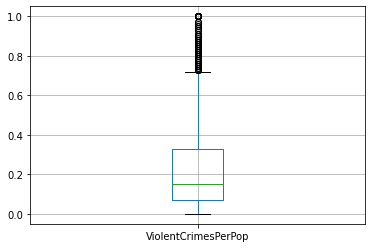

In [9]:
#Boxplot dos dados
data[['ViolentCrimesPerPop']].boxplot(column='ViolentCrimesPerPop')

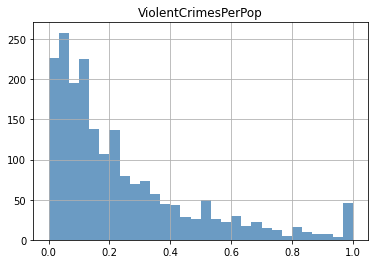

In [10]:
data.hist(column = ['ViolentCrimesPerPop'], bins = 30, color = 'steelblue', alpha = 0.8)
plt.show()

### Análise univariada das covariáveis

In [11]:
df_covariaveis = data.drop(columns=['ViolentCrimesPerPop'], axis=1)
print(f"O dataset possui {df_covariaveis.shape[0]} linhas e {df_covariaveis.shape[1]} colunas.")
df_covariaveis.head()

O dataset possui 1994 linhas e 127 colunas.


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,8,<NA>,<NA>,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,53,<NA>,<NA>,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN
2,24,<NA>,<NA>,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.

Verificando as estatísticas básicas de cada covariável:

- para variáveis categóricas:

In [12]:
df_covariaveis[['state', 'communityname', 'LemasGangUnitDeploy']].describe().T

,count,unique,top,freq
state,1994,46,6,278
communityname,1994,1828,Greenvillecity,5
LemasGangUnitDeploy,319,3,0,126


- para variáveis numéricas:

In [13]:
df_covariaveis.describe().T

,count,mean,std,min,25%,50%,75%,max
county,820.0,58.826829,126.420560,1.0,9.0000,23.000,59.5000,840.0
community,817.0,46188.336597,25299.726569,70.0,25065.0000,48090.000,66660.0000,94597.0
fold,1994.0,5.493982,2.873694,1.0,3.0000,5.000,8.0000,10.0
population,1994.0,0.057593,0.126906,0.0,0.0100,0.020,0.0500,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.3500,0.440,0.5400,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.0200,0.060,0.2300,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.6300,0.850,0.9400,1.0
racePctAsian,1994.0,0.153681,0.208877,0.0,0.0400,0.070,0.1700,1.0
racePctHisp,1994.0,0.144022,0.232492,0.0,0.0100,0.040,0.1600,1.0
agePct12t21,1994.0,0.424218,0.155196,0.0,0.3400,0.400,0.4700,1.0


<AxesSubplot:>

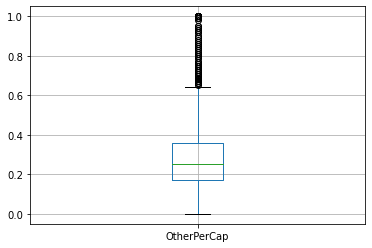

In [14]:
df_covariaveis.boxplot(column='OtherPerCap')

In [15]:
df_covariaveis[['OtherPerCap']].describe().round(2)

,OtherPerCap
count,1993.00
mean,0.28
std,0.19
min,0.00
25%,0.17
50%,0.25
75%,0.36
max,1.00


Como foi observado em uma das etapas anteriores, a variável *OtherPerCap* tem apenas um valor ausente e será preenchido por um valor mediano usando Imputer de sklearn.preprocessing:

In [16]:
# from sklearn.preprocessing import Imputer

# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

# imputer = imputer.fit(data[['OtherPerCap']])
# data[['OtherPerCap']] = imputer.transform(data[['OtherPerCap']])

## Análise bivariada

### Distribuição por estado

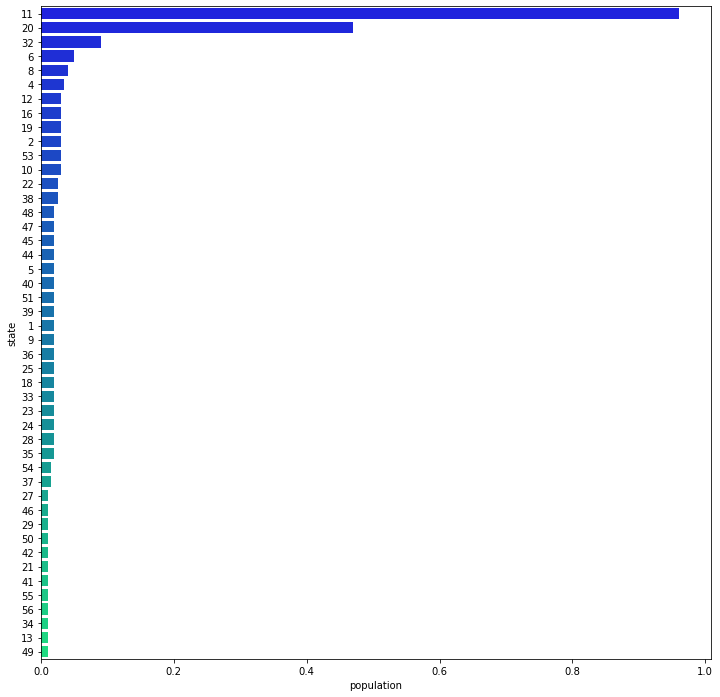

In [17]:
graph_by_state(df=df_covariaveis, col= 'population', estimator='median')

Os 5 estados com maiores densidade demográficas são: 11, 20, 32, 6 e 8. Já os 5 estados com menores índices demográficos são: 55, 56, 34, 13 e 49.

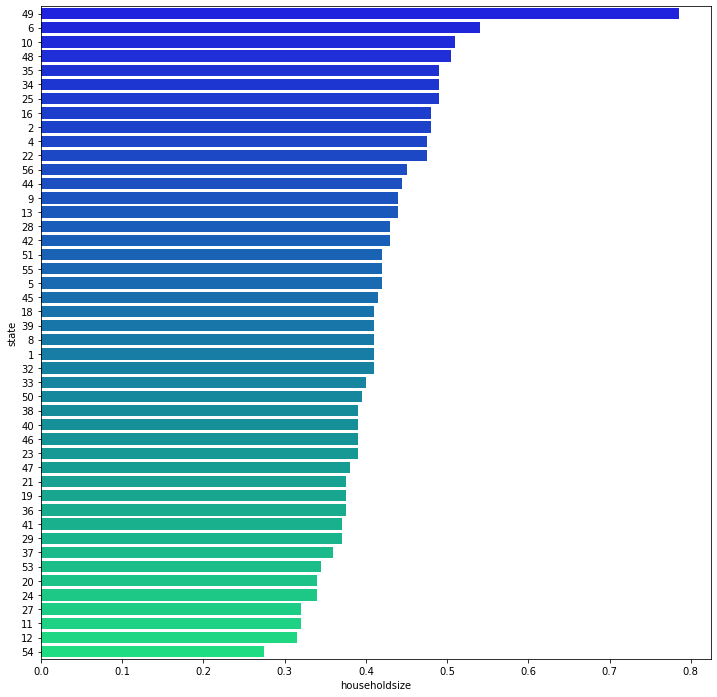

In [18]:
graph_by_state(df= data, col= 'householdsize', estimator='median')

O estado 49 possui o maior tamanho familiar, enquanto que o estado 54 o menor.

### Distribuição racial por estado

Variável: racepctblack


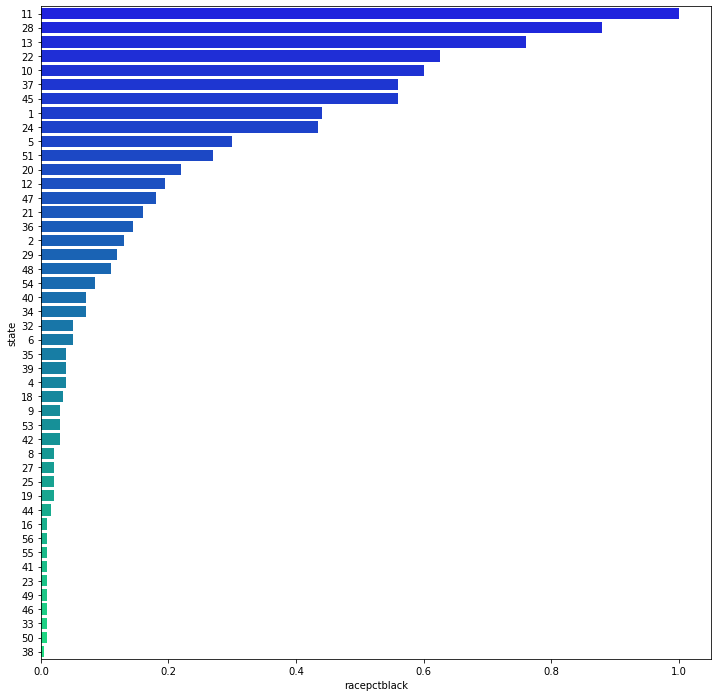

Variável: racePctAsian


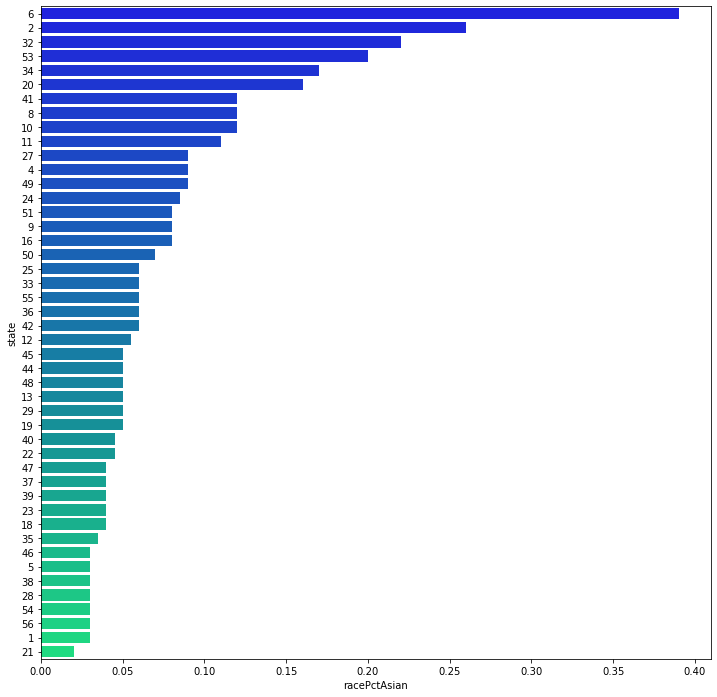

Variável: racePctWhite


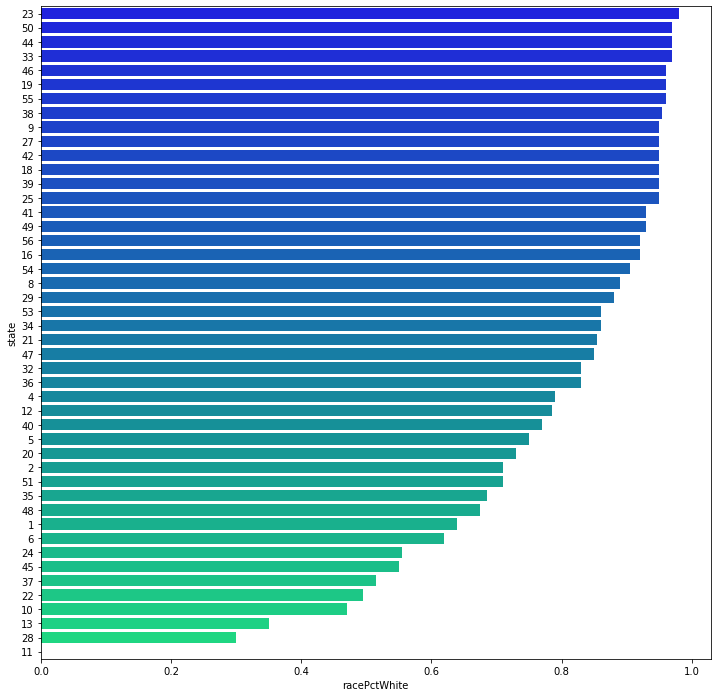

Variável: racePctHisp


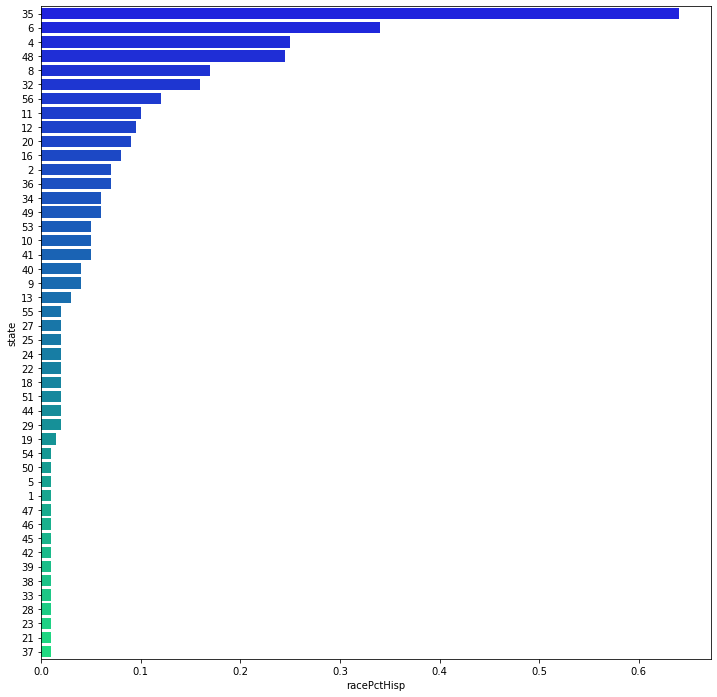

In [19]:
race_list = ['racepctblack', 'racePctAsian', 'racePctWhite',
              'racePctHisp']

for race in race_list:
    print(f'Variável: {race}')
    graph_by_state(df= data, col= race, estimator='median')

## Análise multivariada

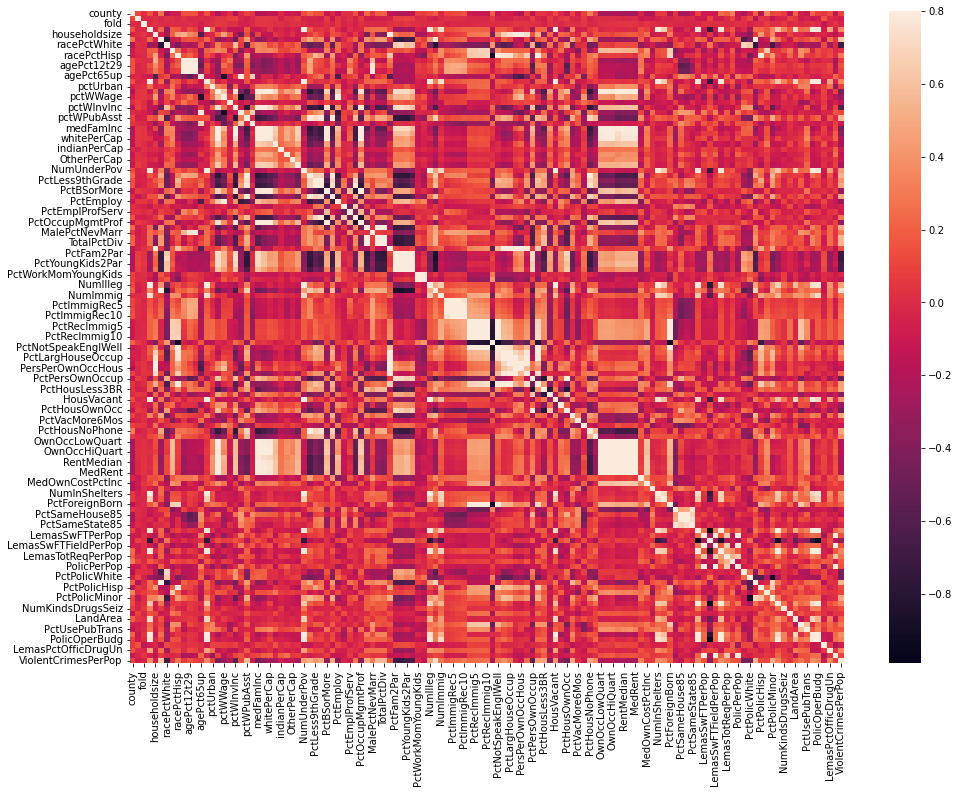

In [20]:
corrmat = data.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()